In [3]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Preparing datasets for analysis
school_location = pd.read_csv("data/school_location.csv")
school_financial = pd.read_csv("data/school_financial.csv")

filter_data = pd.merge(school_location, school_financial, on = ["id","name"], how = "inner")

filter_data["student_number_pellgrant"] = filter_data["percentage_of_pellgrant"] * filter_data["student_count"]
filter_data["student_number_federalloan"] = filter_data["percentage_of_federalloan"] * filter_data["student_count"]

analysis_data = filter_data[["id",
                            "name",
                            "tuition",
                            "public/private",
                            "student_number_pellgrant",
                            "student_number_federalloan"
]]

analysis_data

,id,name,tuition,public/private,student_number_pellgrant,student_number_federalloan
0,100654,Alabama A & M University,9243.0,1.0,3493.6594,3340.2096
1,100663,University of Alabama at Birmingham,11678.0,1.0,4321.2852,5846.2884
2,100706,University of Alabama in Huntsville,8246.0,1.0,1748.9966,2632.6924
3,100724,Alabama State University,8535.0,1.0,2518.1475,2669.1315
4,100751,The University of Alabama,13731.0,1.0,5260.1200,10612.4150
...,...,...,...,...,...,...
5101,497000,Remington College-Knoxville,8751.0,2.0,171.5868,153.1908
5102,497222,Salon Professional Academy-Elevate Salon Insti...,12789.0,3.0,9.5841,11.9784
5103,497268,Arizona College of Nursing-Salt Lake City,6378.0,3.0,79.7196,186.0000
5104,497277,Arizona College-Glendale,9305.0,3.0,352.0440,338.5872


In [5]:
# Linear Regression modeling
x_values = analysis_data["tuition"]
y_values = analysis_data["student_number_pellgrant"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))


The r-squared is: -0.0817711543926877


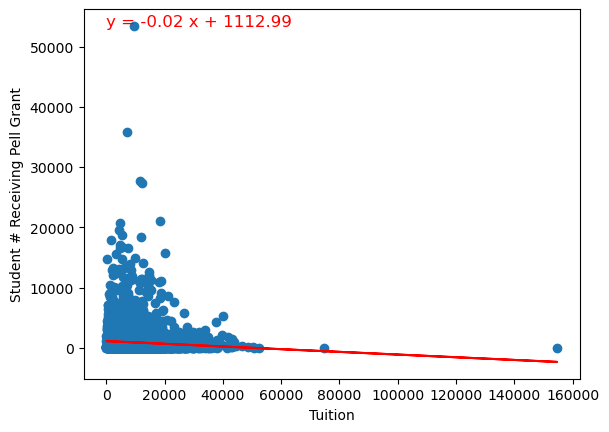

In [6]:
# Plotting the Data
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.text(x_values.min(), y_values.max(), line_eq, fontsize=12, color="red")
plt.xlabel("Tuition")
plt.ylabel("Student # Receiving Pell Grant")
print(f"The r-squared is: {rvalue}")
plt.show() 

In [7]:
# Linear Regression modeling
x_values = analysis_data["tuition"]
y_values = analysis_data["student_number_federalloan"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

The r-squared is: 0.08377109867093004


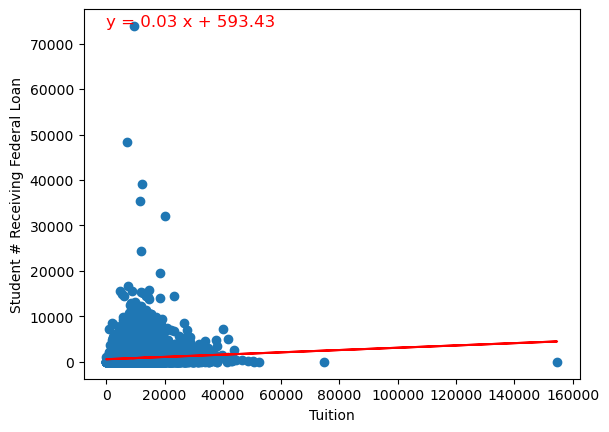

In [8]:
# Plotting the Data
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.text(x_values.min(), y_values.max(), line_eq, fontsize=12, color="red")
plt.xlabel("Tuition")
plt.ylabel("Student # Receiving Federal Loan")
print(f"The r-squared is: {rvalue}")
plt.show() 

In [10]:
# Preparing datasets for analysis

filter_data = pd.merge(school_location, school_financial, on = ["id","name"], how = "inner")

filter_data["student_number_pellgrant"] = filter_data["percentage_of_pellgrant"] * filter_data["student_count"]
filter_data["student_number_federalloan"] = filter_data["percentage_of_federalloan"] * filter_data["student_count"]

select_data = filter_data[["id",
                            "name",
                            "cost_of_admission",
                            "public/private",
                            "student_number_pellgrant",
                            "student_number_federalloan",
                            "percentage_of_pellgrant",
                            "percentage_of_federalloan"
                            
]]

population1 = select_data.loc[select_data["public/private"] == 1, :]["cost_of_admission"]

population2 = select_data.loc[select_data["public/private"] != 1, :]["cost_of_admission"]

In [11]:
# Generate some fake data to test with
def gendata(loc1=0, loc2=0):

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

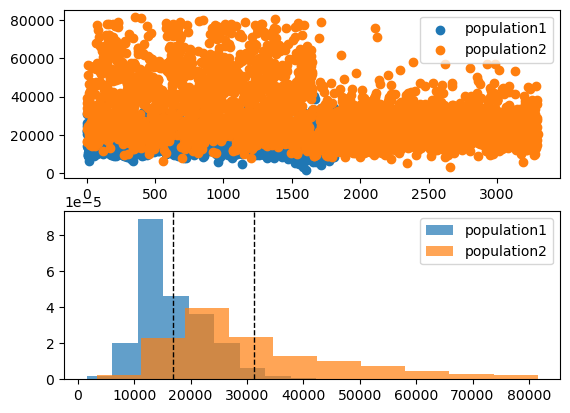

In [12]:
# Generate some data and show the scatter plot
population1, population2 = gendata()

In [13]:
import scipy.stats as stats

# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=-47.8970591011592, pvalue=0.0)